# Космический корабль Титаник

In [1]:
!pip install tensorflow_decision_forests

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
  Attempting uninstal

## EDA

In [19]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
num_rows_tr = len(train_data)
num_rows_ts = len(test_data)
num_rows_tr, num_rows_ts

(8693, 4277)

In [ ]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


*Стандартное отклонение для признаков RoomService, FoodCourt, ShoppingMall, Spa и VRDeck значительно выше среднего значения в обоих наборах данных (особенно в тренировочном). Это говорит о большом разбросе значений в этих признаках, что может указывать на наличие выбросов или мультимодальное распределение.*

*Средние значения RoomService и FoodCourt в train и test наборах существенно отличаются (224.69 и 458.08 в train против 219.27 и 439.48 в test, соответственно), как и их стандартные отклонения. Это может указывать на разное распределение этих признаков в выборках, что может ухудшить обобщающую способность модели, обученной на train.*

*Признак Age имеет более устойчивую статистику. Средние и стандартные отклонения этого признака достаточно близки в обоих наборах данных. Кроме того, 25%, 50% и 75% квантили также очень похожи.*

#### Анализ пропусков

In [ ]:
def analyze_missing_values(data, dataset_name):

  null_counts = data.isnull().sum()
  null_percentages = (null_counts / len(data)) * 100

  missing_info = pd.DataFrame({'Количество пропущенных значений': null_counts,
                                'Процент пропущенных значений': null_percentages})

  print(f"\nАнализ пропущенных значений в {dataset_name}\n")
  print(missing_info)

analyze_missing_values(train_data, "тренировочном наборе данных")
analyze_missing_values(test_data, "тестовом наборе данных")


Анализ пропущенных значений в тренировочном наборе данных

              Количество пропущенных значений  Процент пропущенных значений
PassengerId                                 0                      0.000000
HomePlanet                                201                      2.312205
CryoSleep                                 217                      2.496261
Cabin                                     199                      2.289198
Destination                               182                      2.093639
Age                                       179                      2.059128
VIP                                       203                      2.335212
RoomService                               181                      2.082135
FoodCourt                                 183                      2.105142
ShoppingMall                              208                      2.392730
Spa                                       183                      2.105142
VRDeck                      

<Axes: >

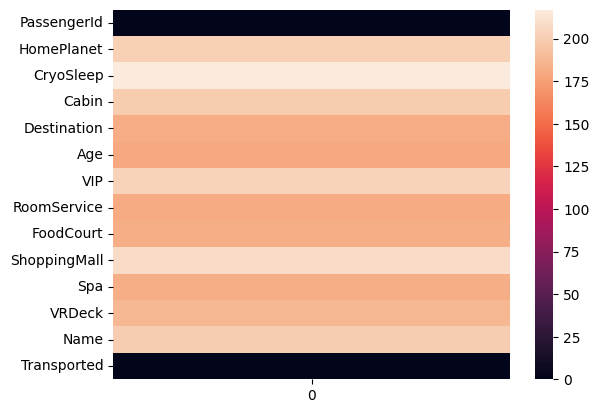

In [ ]:
sns.heatmap(train_data.isnull().sum().to_frame())

Пропуски равномерно распределены между train и test. Процент пропусков для каждого признака относительно невелик (всегда меньше 2.5%).


Учитывая небольшой процент пропусков и потенциальную ценность информации используем одну из стратегий заполнения пропусков:

1.  Категориальные признаки:

    •   HomePlanet, CryoSleep, Destination, VIP - так как это категориальные признаки, лучше заполнить пропуски самым часто встречающимся значением (модой).
    •   Cabin - структура записи в столбце позволяет разделить его на несколько компонентов.

2.  Числовые признаки:

    •   Age - Заполнение медианным значением более устойчиво к выбросам, чем заполнение средним.
    •   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Посмотрим, связаны ли пропуски с тем, что пассажир просто не пользовался этими услугами. Если это так, заполнение нулями может быть логичным. В противном случае — заполнение медианой.
    •   Name - Этот столбец, скорее всего, не повлияет на результат обучения модели. Можно заполнить пропуски в столбце Name значением 'Unknown'.


#### Работа с пропущенными значениями

In [20]:
# Создаем новые столбцы, заполняя их значениями по умолчанию

train_data['CabinDeck'] = train_data['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else 'Unknown')
train_data['CabinNum'] = train_data['Cabin'].apply(lambda x: x.split('/')[1] if isinstance(x, str) else -1).astype(int) # Используем -1 для числовых пропусков
train_data['CabinSide'] = train_data['Cabin'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else 'Unknown')

test_data['CabinDeck'] = test_data['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else 'Unknown')
test_data['CabinNum'] = test_data['Cabin'].apply(lambda x: x.split('/')[1] if isinstance(x, str) else -1).astype(int)
test_data['CabinSide'] = test_data['Cabin'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else 'Unknown')

In [21]:
# CabinDeck
mode_deck = train_data['CabinDeck'].mode()[0]
train_data['CabinDeck'].fillna(mode_deck, inplace=True)
test_data['CabinDeck'].fillna(mode_deck, inplace=True)

# CabinNum
median_num = train_data['CabinNum'].median()
train_data['CabinNum'].fillna(median_num, inplace=True)
test_data['CabinNum'].fillna(median_num, inplace=True)

# CabinSide
mode_side = train_data['CabinSide'].mode()[0]
train_data['CabinSide'].fillna(mode_side, inplace=True)
test_data['CabinSide'].fillna(mode_side, inplace=True)

In [22]:

    # Категориальные признаки: заполнение модой
    train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
    test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0])

    train_data['CryoSleep'] = train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])
    test_data['CryoSleep'] = test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0])

    train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
    test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])

    train_data['VIP'] = train_data['VIP'].fillna(train_data['VIP'].mode()[0])
    test_data['VIP'] = test_data['VIP'].fillna(test_data['VIP'].mode()[0])

    # Числовые признаки: Age: заполнение медианой
    train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
    test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

    # RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: заполнение нулями
    train_data['RoomService'] = train_data['RoomService'].fillna(0)
    test_data['RoomService'] = test_data['RoomService'].fillna(0)

    train_data['FoodCourt'] = train_data['FoodCourt'].fillna(0)
    test_data['FoodCourt'] = test_data['FoodCourt'].fillna(0)

    train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(0)
    test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(0)

    train_data['Spa'] = train_data['Spa'].fillna(0)
    test_data['Spa'] = test_data['Spa'].fillna(0)

    train_data['VRDeck'] = train_data['VRDeck'].fillna(0)
    test_data['VRDeck'] = test_data['VRDeck'].fillna(0)

    # Name: заполнение 'Unknown'
    train_data['Name'] = train_data['Name'].fillna('Unknown')
    test_data['Name'] = test_data['Name'].fillna('Unknown')

    print("Пропущенные значения в train_data после обработки:\n", train_data.isnull().sum())
    print("\nПропущенные значения в test_data после обработки: \n", test_data.isnull().sum())

Пропущенные значения в train_data после обработки:
 PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
CabinDeck         0
CabinNum          0
CabinSide         0
dtype: int64

Пропущенные значения в test_data после обработки: 
 PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
CabinDeck         0
CabinNum          0
CabinSide         0
dtype: int64


In [23]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [ ]:
test_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


#### Transported в Тренировочном наборе данных


Распределение 'Transported' в 'Тренировочный набор данных':
Transported
True    50.36%
False   49.64%


<ipython-input-27-7932bbe2390f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target_variable, data=data, palette=[PRIMARY_COLOR])
<ipython-input-27-7932bbe2390f>:12: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=target_variable, data=data, palette=[PRIMARY_COLOR])


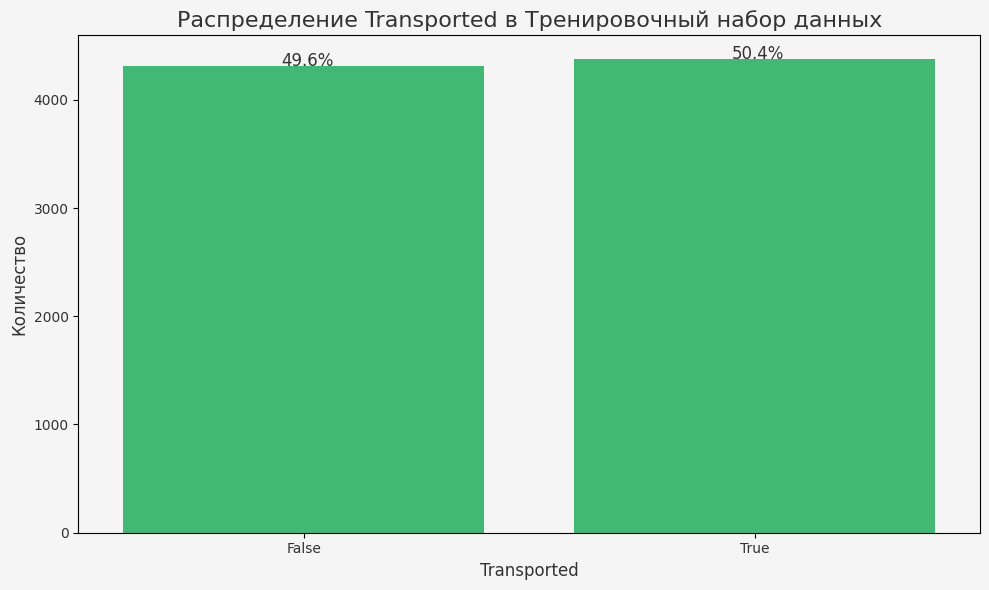

In [ ]:
PRIMARY_COLOR = '#2ecc71'
BG_COLOR = '#f5f5f5'
TEXT_COLOR = '#333333'

def show_target_distribution(data, target_variable, dataset_name):
    distribution = data[target_variable].value_counts(normalize=True) * 100

    print(f"\nРаспределение '{target_variable}' в '{dataset_name}':")
    print(distribution.to_string(float_format='{:.2f}%'.format))

    plt.figure(figsize=(10, 6), facecolor=BG_COLOR)
    ax = sns.countplot(x=target_variable, data=data, palette=[PRIMARY_COLOR])
    ax.set_facecolor(BG_COLOR)

    plt.title(f'Распределение {target_variable} в {dataset_name}', color=TEXT_COLOR, fontsize=16)
    plt.ylabel('Количество', color=TEXT_COLOR, fontsize=12)
    plt.xlabel(target_variable, color=TEXT_COLOR, fontsize=12)
    plt.xticks(color=TEXT_COLOR)
    plt.yticks(color=TEXT_COLOR)

    total_count = len(data)
    for patch in ax.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height() / total_count)
        x_coord = patch.get_x() + patch.get_width()/2 - 0.05
        y_coord = patch.get_y() + patch.get_height()
        ax.text(x_coord, y_coord, percentage, size=12, color=TEXT_COLOR)

    plt.tight_layout()
    plt.show()


show_target_distribution(train_data, 'Transported', "Тренировочный набор данных")

#### Категориальные переменные

<ipython-input-36-342ede2c81ea>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values,


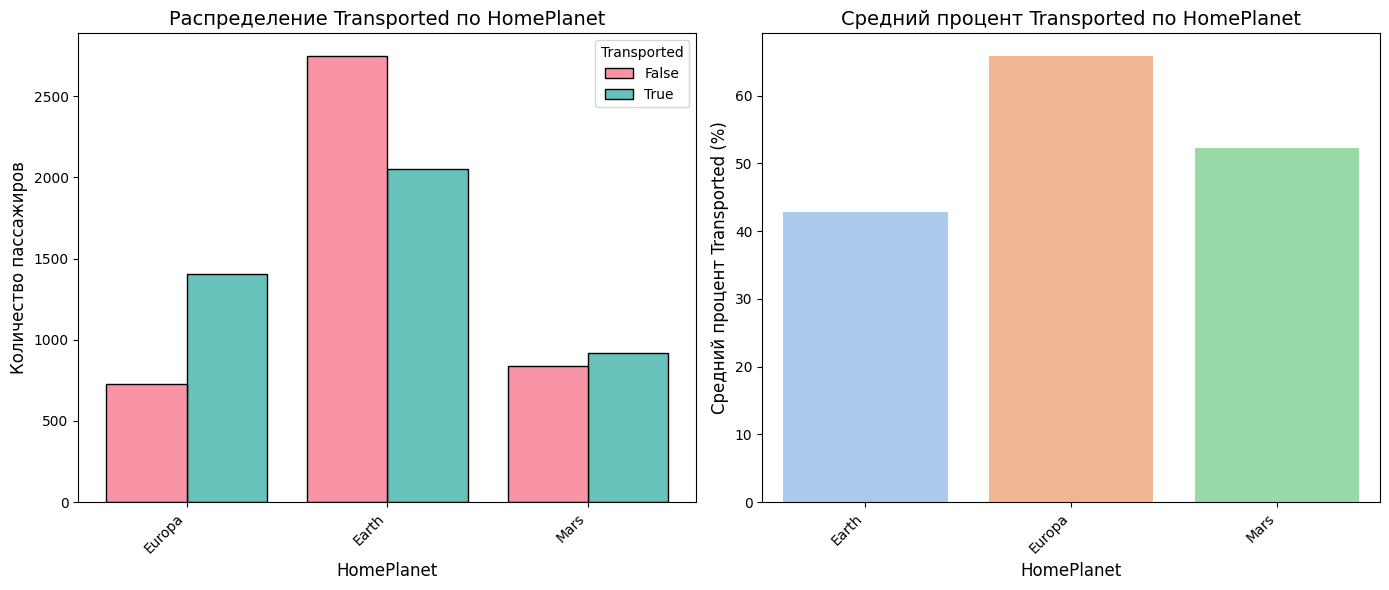

<ipython-input-36-342ede2c81ea>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values,


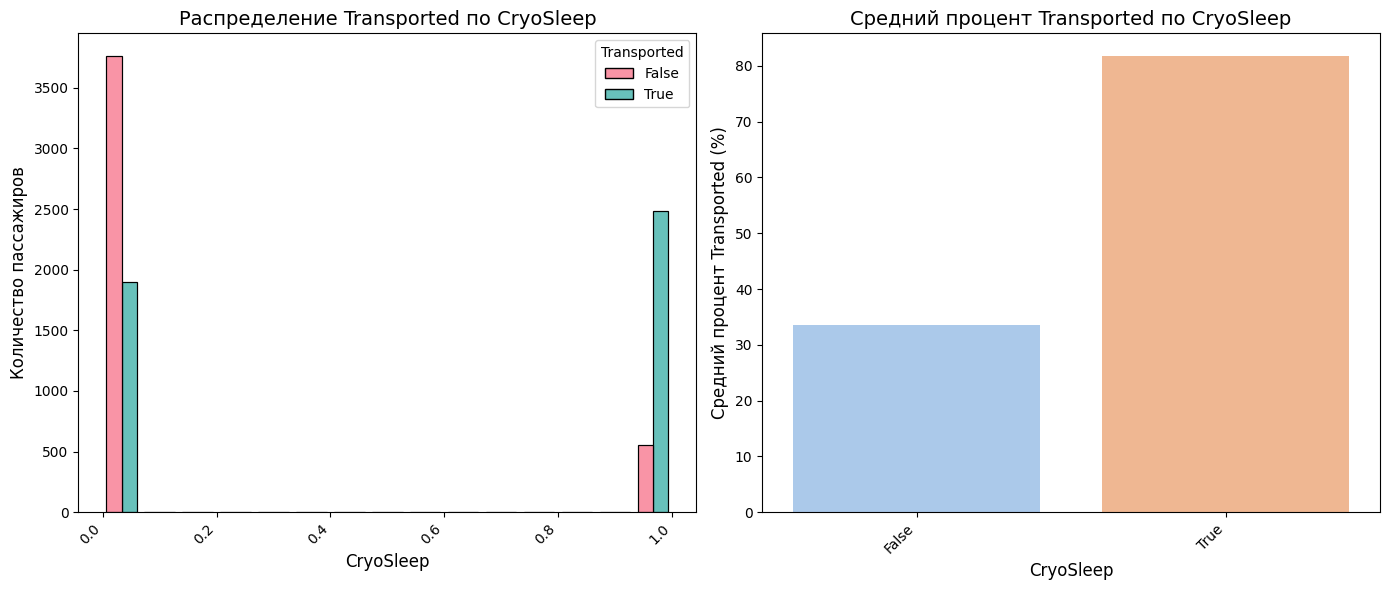

<ipython-input-36-342ede2c81ea>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values,


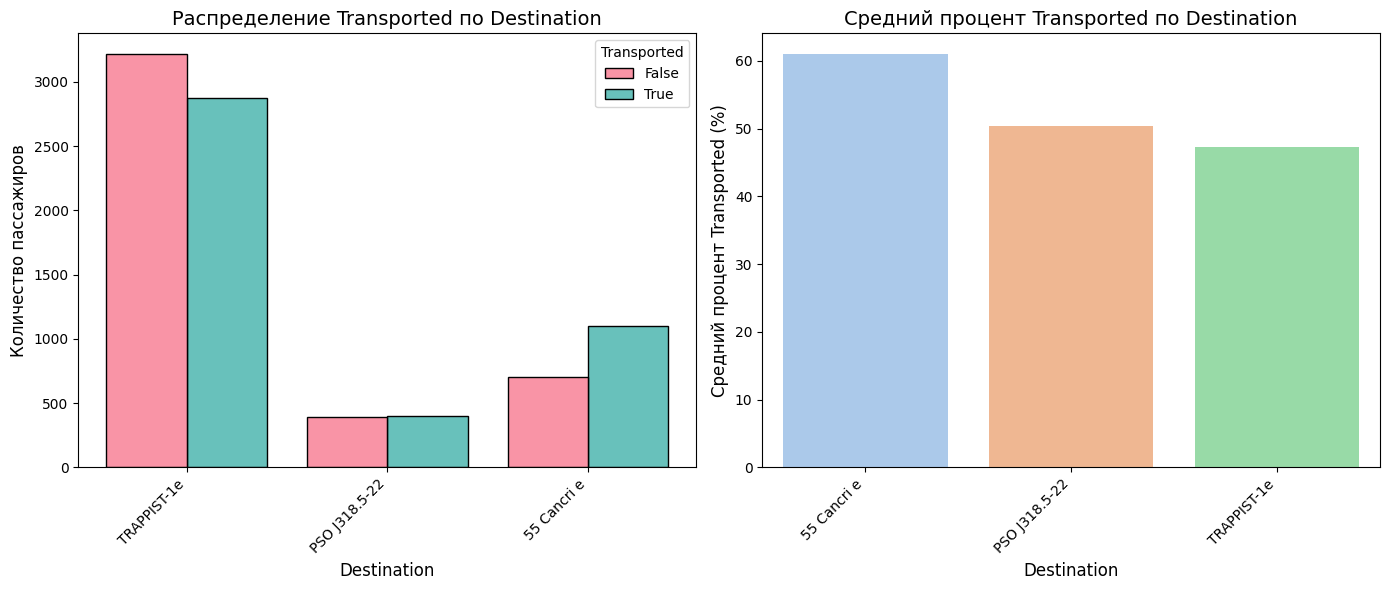

<ipython-input-36-342ede2c81ea>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values,


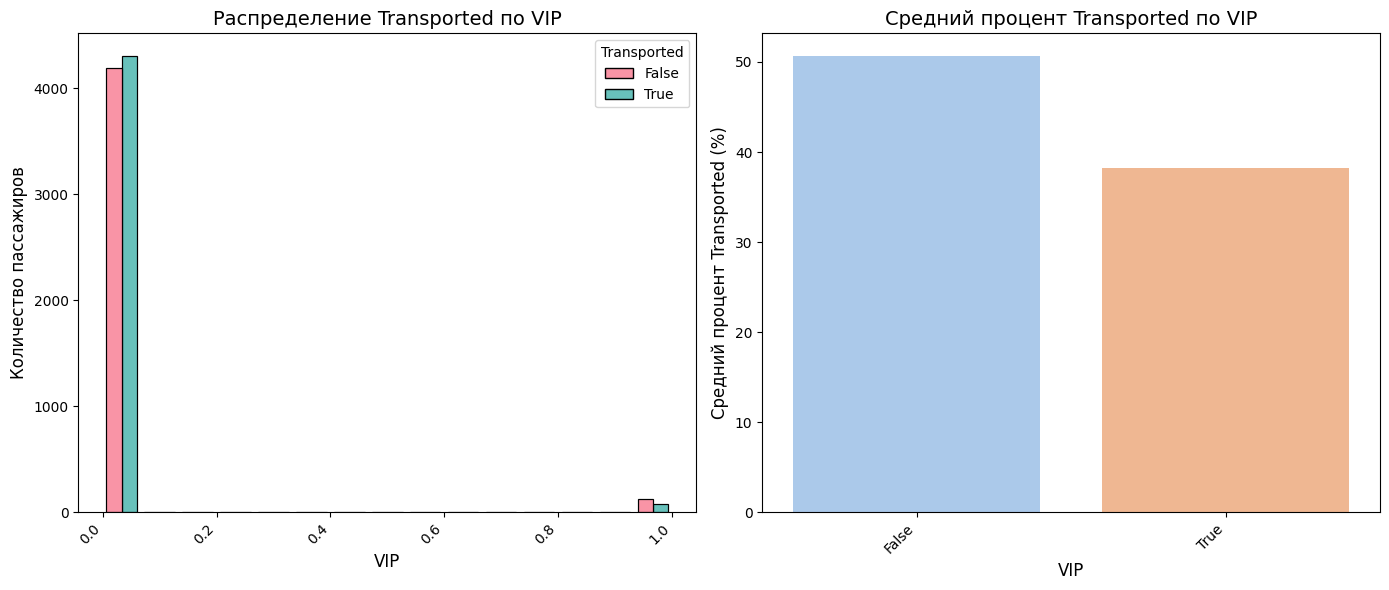

In [ ]:
def explore_categorical_relationship(data, category_list, target_variable):

    for category in category_list:
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(data=data, x=category, hue=target_variable, multiple="dodge", shrink=0.8,
                     palette="husl")
        plt.title(f'Распределение {target_variable} по {category}', fontsize=14)
        plt.xlabel(category, fontsize=12)
        plt.ylabel('Количество пассажиров', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        plt.subplot(1, 2, 2)
        category_means = data.groupby(category)[target_variable].mean() * 100
        sns.barplot(x=category_means.index, y=category_means.values,
                    palette="pastel")
        plt.title(f'Средний процент {target_variable} по {category}', fontsize=14)
        plt.xlabel(category, fontsize=12)
        plt.ylabel(f'Средний процент {target_variable} (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
explore_categorical_relationship(train_data, categorical_features, 'Transported')

Пассажиры с Земли имеют самый низкий процент перемещения среди всех планет отправления. Криосон является мощным предиктором перемещения, значительно повышая его вероятность. Вероятность перемещения зависит от конечного пункта назначения, а VIP статус пассажира слабо связан с вероятностью перемещения.

#### Непрерывные числовые признаки

<ipython-input-37-a18169a51ea8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


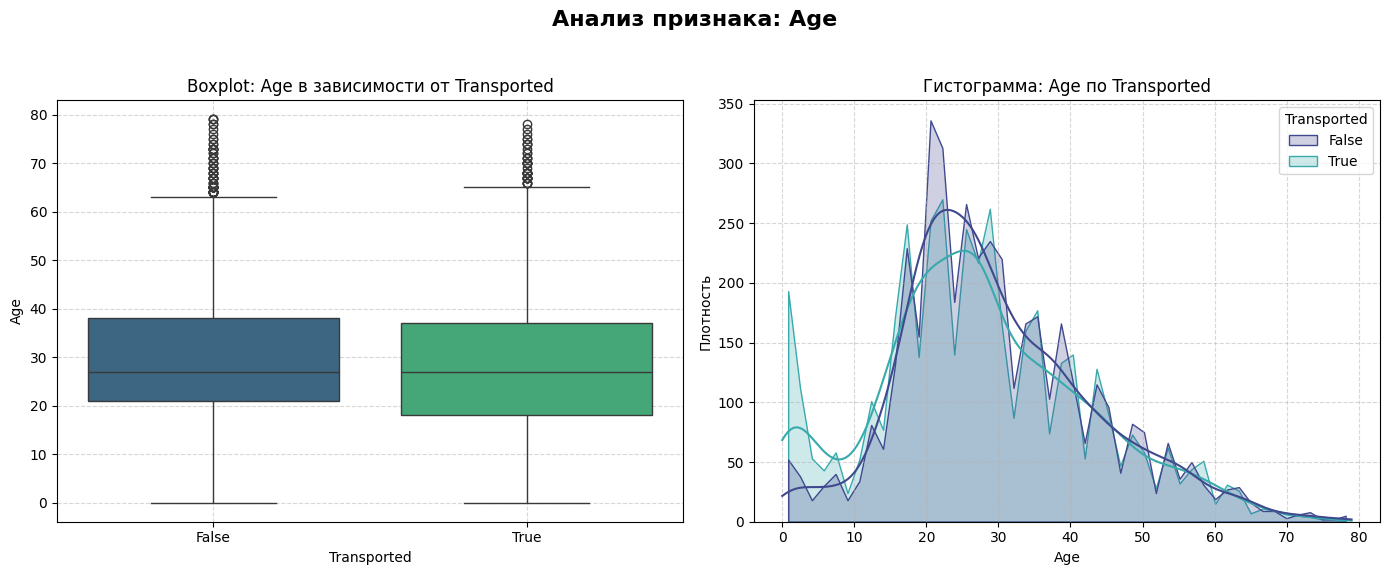

<ipython-input-37-a18169a51ea8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


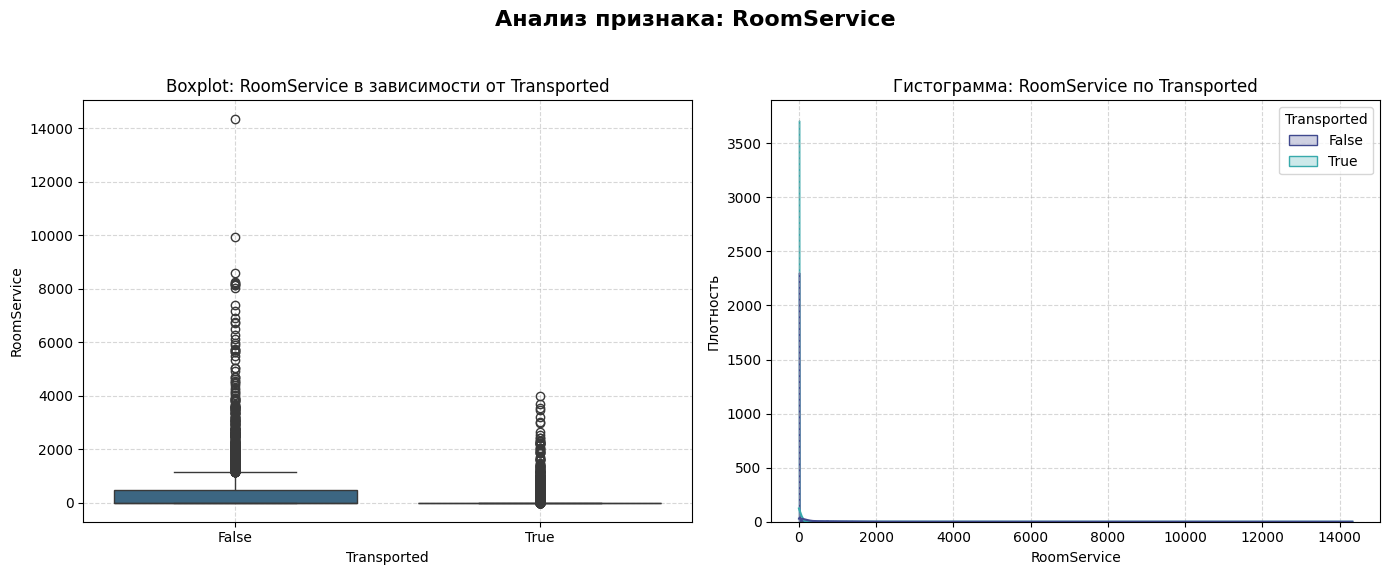

<ipython-input-37-a18169a51ea8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


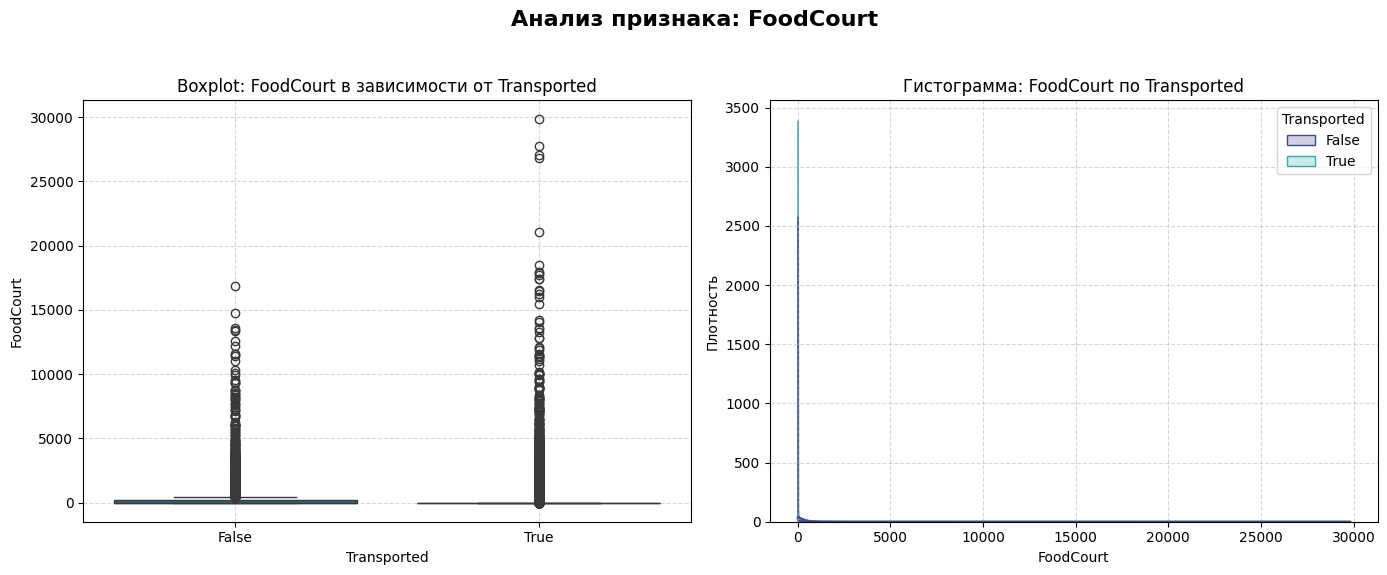

<ipython-input-37-a18169a51ea8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


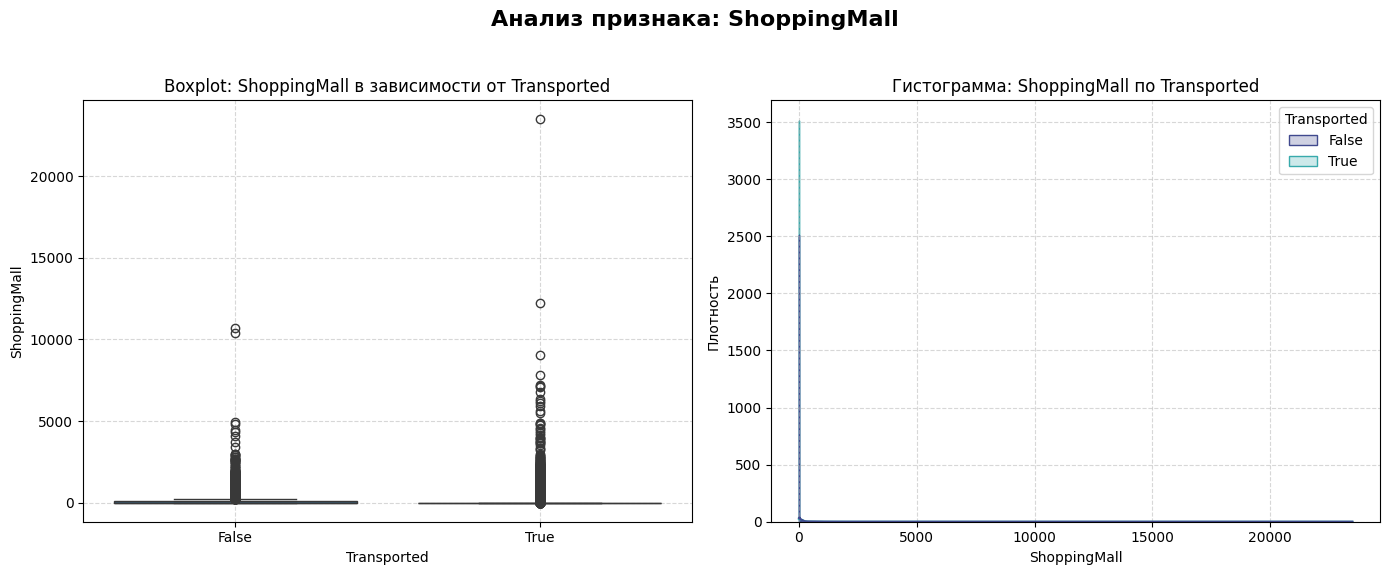

<ipython-input-37-a18169a51ea8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


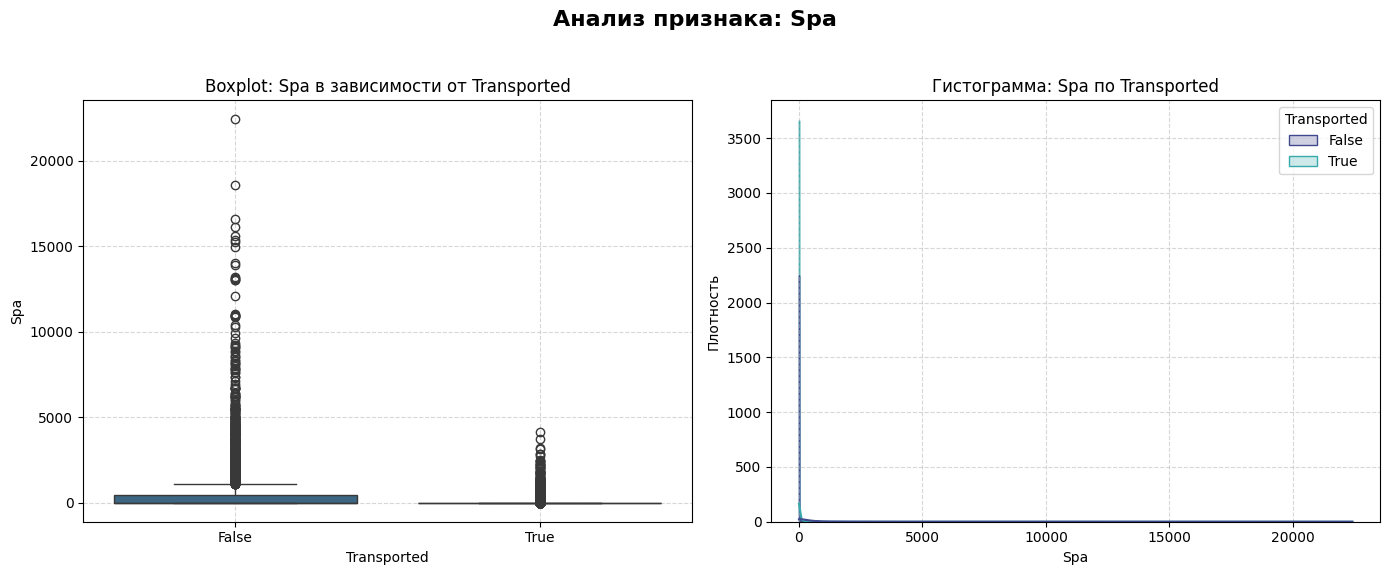

<ipython-input-37-a18169a51ea8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


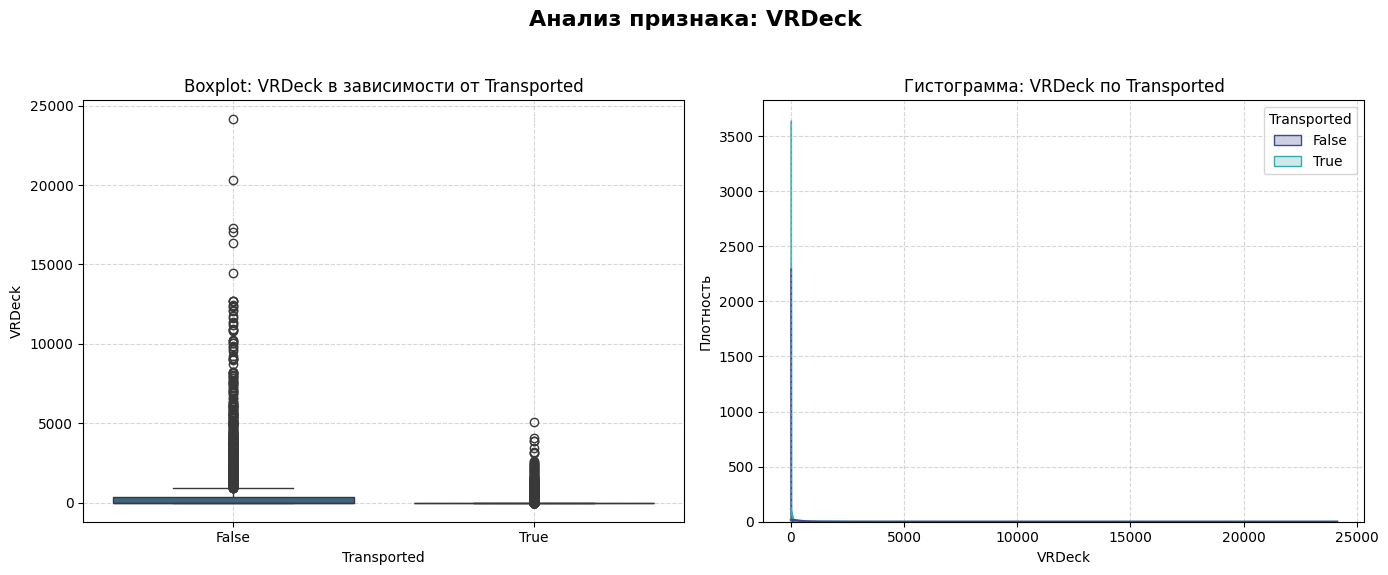

<ipython-input-37-a18169a51ea8>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


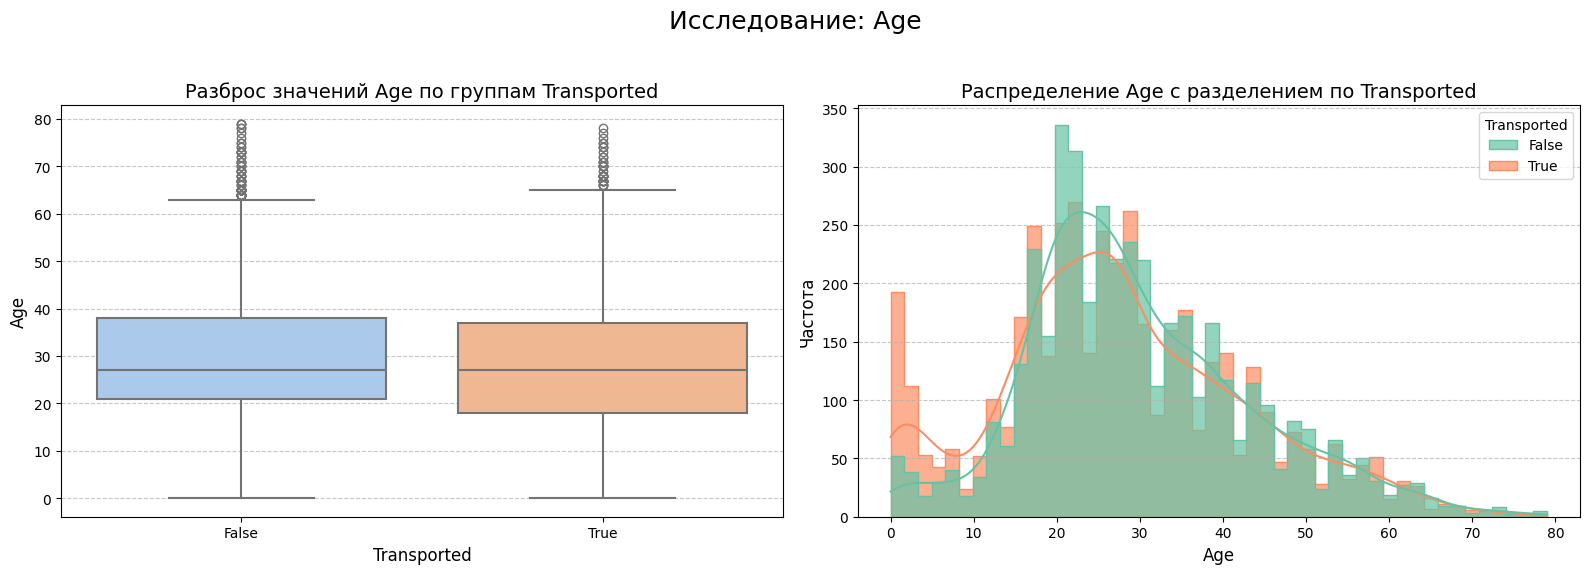

<ipython-input-37-a18169a51ea8>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


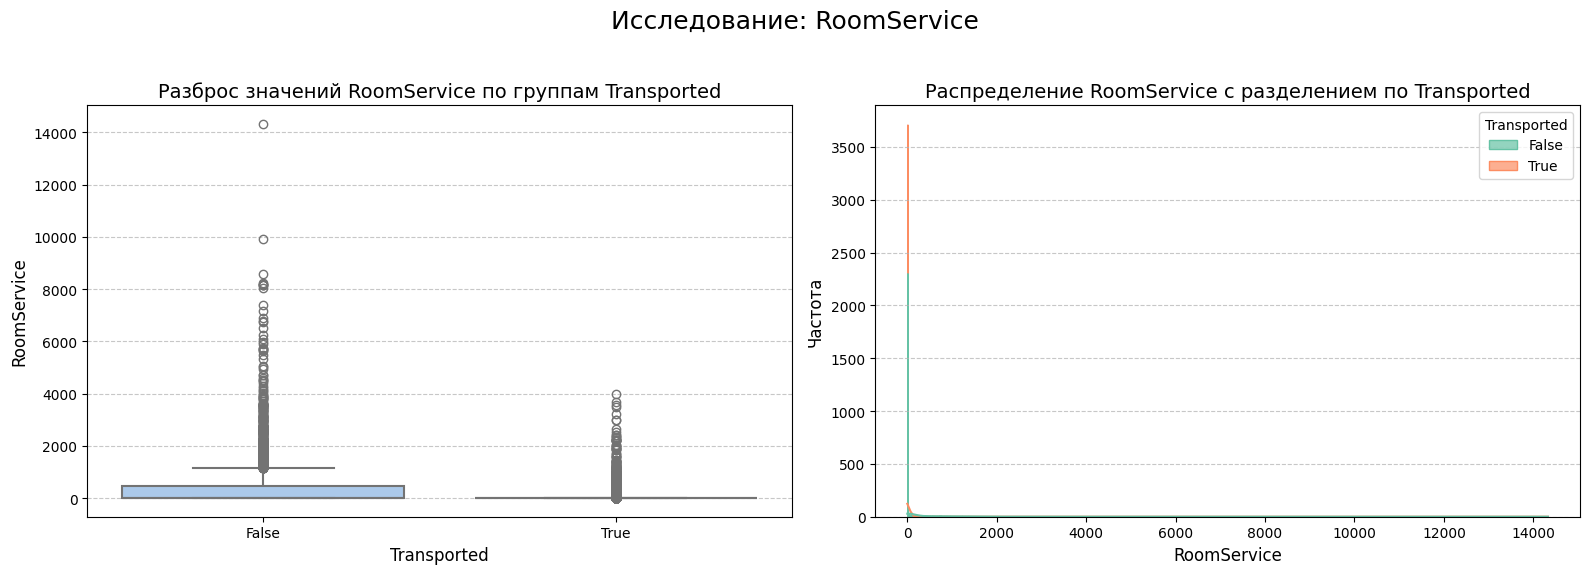

<ipython-input-37-a18169a51ea8>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


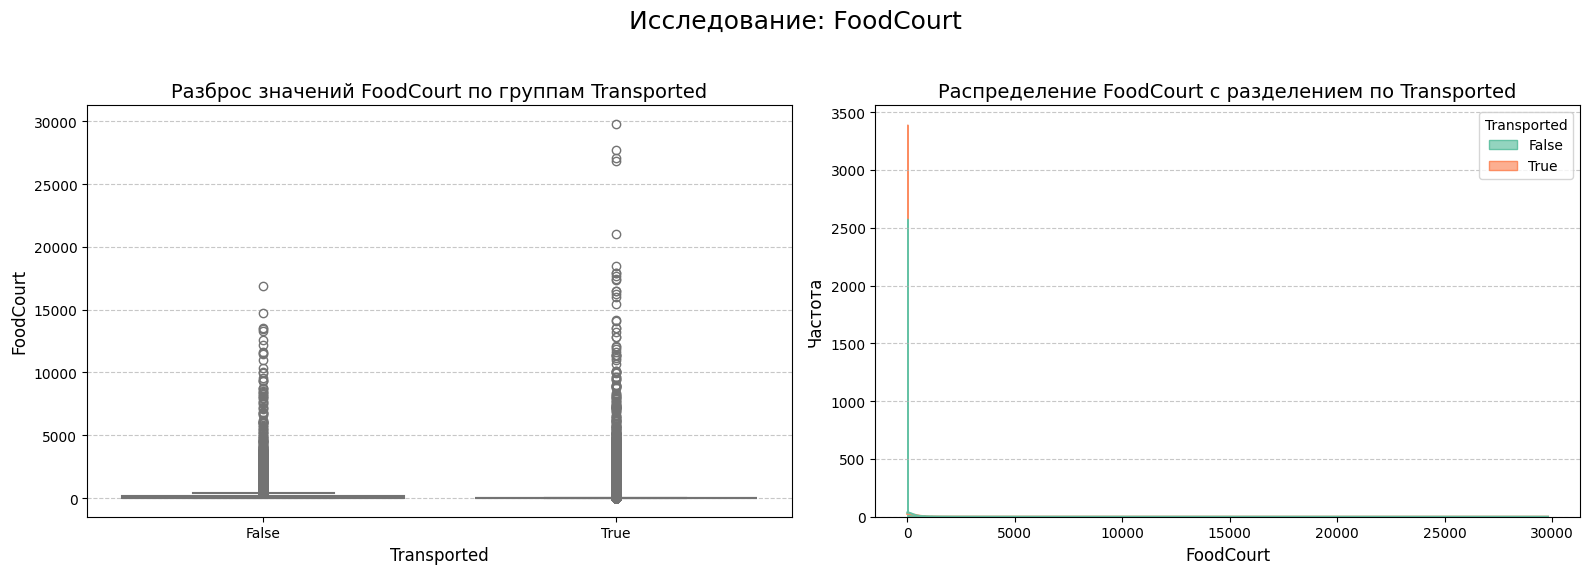

<ipython-input-37-a18169a51ea8>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


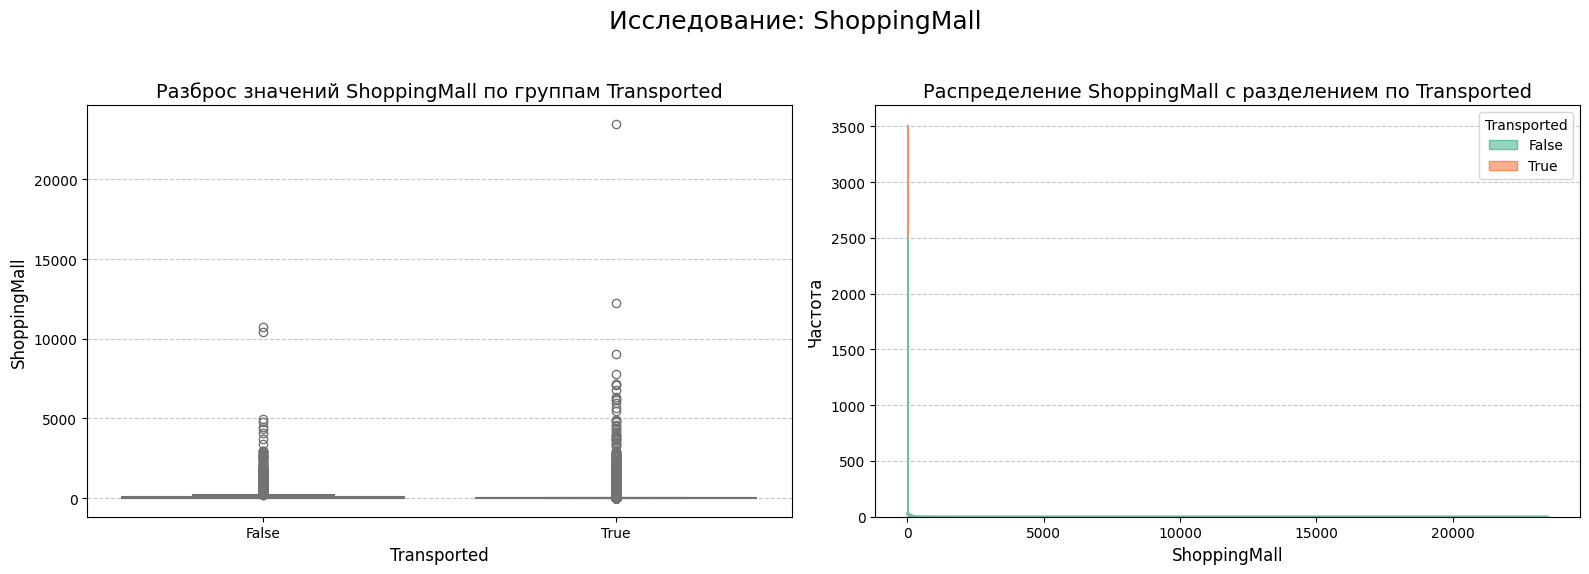

<ipython-input-37-a18169a51ea8>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


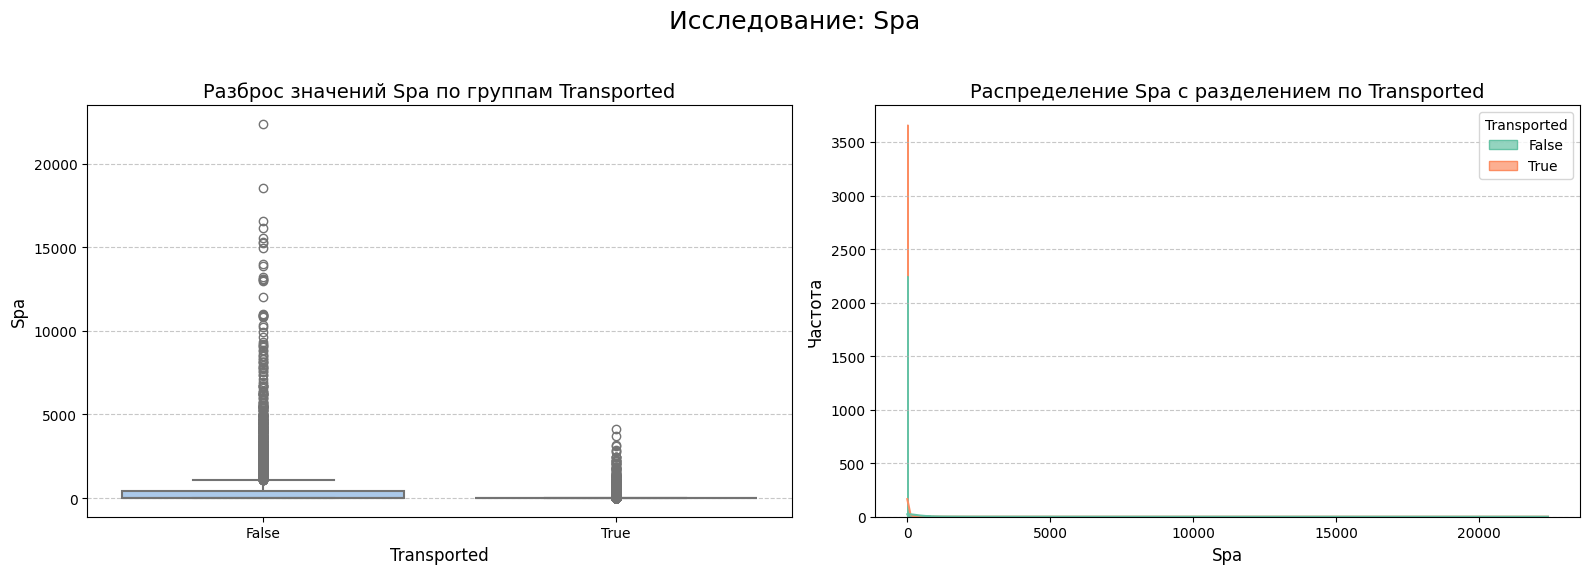

<ipython-input-37-a18169a51ea8>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


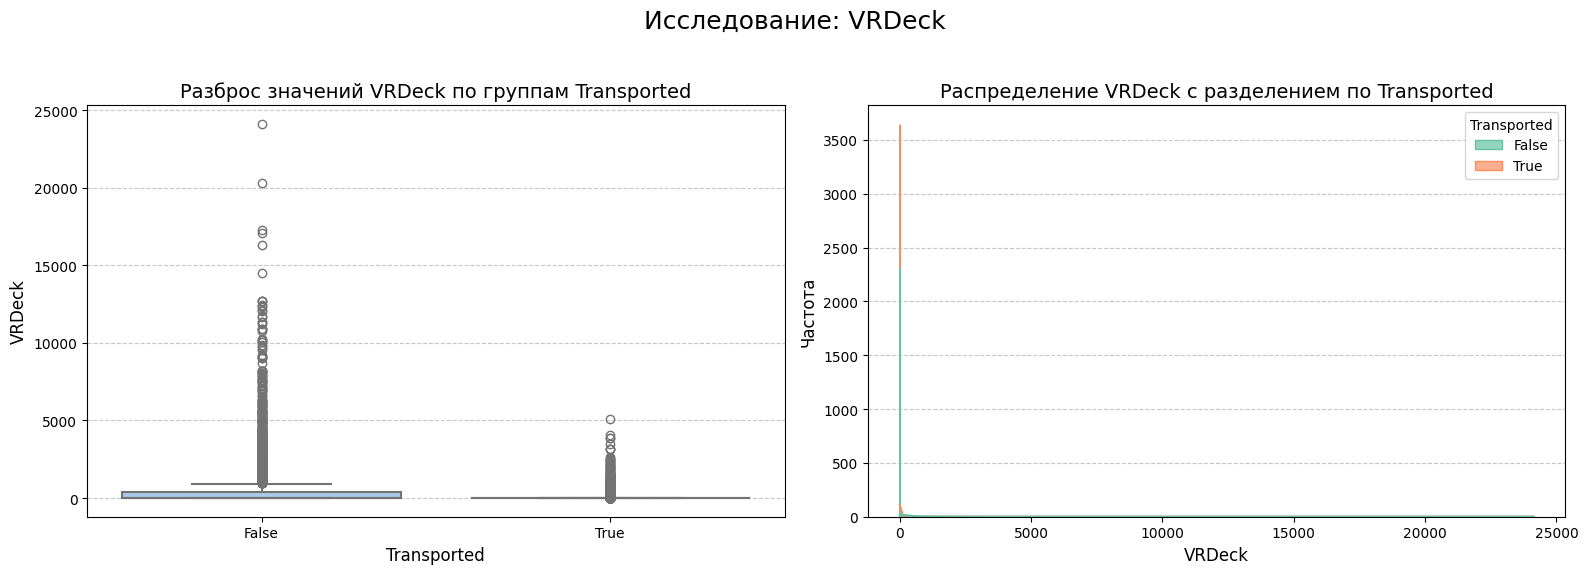

In [ ]:
continuous_variables = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

def visualize_continuous_features(dataframe, features, target_variable):

    num_features = len(features)
    for i, feature in enumerate(features):

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Анализ признака: {feature}', fontsize=16, fontweight='bold')

        sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")
        axes[0].set_title(f'Boxplot: {feature} в зависимости от {target_variable}', fontsize=12)
        axes[0].set_xlabel(target_variable, fontsize=10)
        axes[0].set_ylabel(feature, fontsize=10)
        axes[0].grid(True, linestyle='--', alpha=0.5)

        sns.histplot(ax=axes[1], data=dataframe, x=feature, hue=target_variable, element="poly", kde=True, palette="mako")
        axes[1].set_title(f'Гистограмма: {feature} по {target_variable}', fontsize=12)
        axes[1].set_xlabel(feature, fontsize=10)
        axes[1].set_ylabel('Плотность', fontsize=10)
        axes[1].grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

visualize_continuous_features(train_data, continuous_variables, 'Transported')

def demonstrate_data_insights(df, numeric_cols, target_col):

    for col in numeric_cols:
        create_feature_visualization(df, col, target_col)

def create_feature_visualization(df, feature_name, target):

     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
     fig.suptitle(f'Исследование: {feature_name}', fontsize=18)

     sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')
     ax1.set_title(f'Разброс значений {feature_name} по группам {target}', fontsize=14)
     ax1.set_ylabel(feature_name, fontsize=12)
     ax1.set_xlabel(target, fontsize=12)
     ax1.tick_params(axis='both', labelsize=10)
     ax1.grid(axis='y', linestyle='--', alpha=0.7)

     sns.histplot(data=df, x=feature_name, hue=target, element="step", kde=True, fill=True, ax=ax2, palette='Set2', alpha=0.7)
     ax2.set_title(f'Распределение {feature_name} с разделением по {target}', fontsize=14)
     ax2.set_ylabel('Частота', fontsize=12)
     ax2.set_xlabel(feature_name, fontsize=12)
     ax2.tick_params(axis='both', labelsize=10)
     ax2.grid(axis='y', linestyle='--', alpha=0.7)

     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
     plt.show()

demonstrate_data_insights(train_data, continuous_variables, 'Transported')

Молодые люди (0-20 лет) чаще оказываются в группе Transported = True. Высокие траты на RoomService, FoodCourt и т.д. могут снижать вероятность Transported = True.

Траты на RoomService, FoodCourt, ShoppingMall, Spa и VRDeck коррелируют между собой.

#### Корреляционная матрица

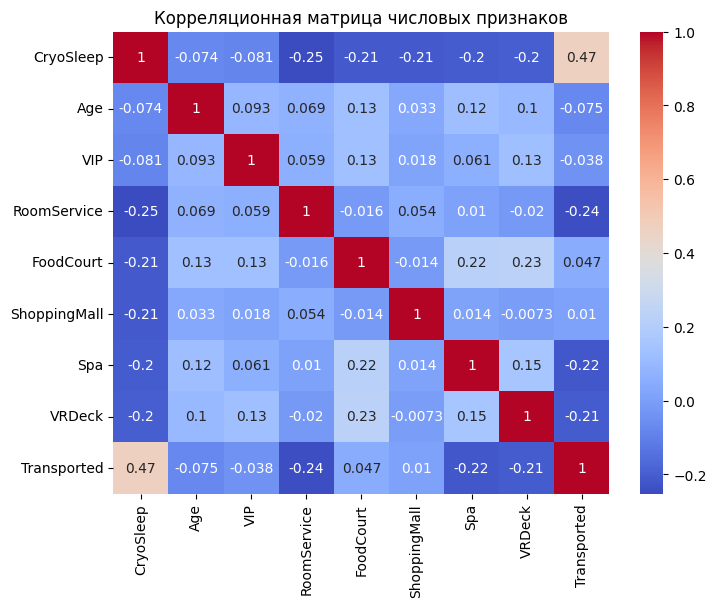

In [ ]:
cat_columns = [col for col in train_data if isinstance(train_data[col][0], str)]
num_columns = [col for col in train_data if not isinstance(train_data[col][0], str)]
df = train_data[num_columns]

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

target_variable = 'Target'

Существует умеренная положительная корреляция между признаком CryoSleep и целевой переменной Transported (0.47). Это говорит о том, что CryoSleep может быть важным предиктором целевой переменной.

В целом, сильной мультиколлинеарности между предикторами (не считая единичной диагонали) не наблюдается. Большинство корреляций между предикторами довольно слабые (близки к 0). Однако, стоит обратить внимание на несколько пар признаков, где корреляция немного выше, чем у остальных, например, Spa и VRDeck (0.15), FoodCourt и Spa (0.22), FoodCourt и VRDeck (0.23). Хотя это и не критично, при использовании линейных моделей может быть полезно рассмотреть вопрос об их объединении или удалении одного из пары.

Вовлеченность в сервисы, такие как RoomService, FoodCourt, ShoppingMall, Spa и VRDeck, по отдельности не показывают сильной корреляции с целевой переменной. Это может означать, что их влияние на Transported сложнее, чем простое линейное. Возможно, их комбинация или взаимодействие друг с другом оказывает более значительное воздействие.


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Подготовка данных к моделированию
X_train_full = train_data.copy()
X_test_full = test_data.copy()
y_train_full = X_train_full['Transported']
X_train_full = X_train_full.drop('Transported', axis=1, errors='ignore')

# Объединяем X_train_full и X_test_full для общей обработки
X_combined = pd.concat([X_train_full, X_test_full], axis=0)

In [10]:
X_combined.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1,S


In [17]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Преобразование категориальных признаков в числовые

# Преобразование True/False в 0/1
X_combined['CryoSleep'] = X_combined['CryoSleep'].astype(int)
X_combined['VIP'] = X_combined['VIP'].astype(int)

# Label Encoding HomePlanet
label_encoder_homeplanet = LabelEncoder()
X_combined['HomePlanet'] = label_encoder_homeplanet.fit_transform(X_combined['HomePlanet'])

# Label Encoding Destination
label_encoder_destination = LabelEncoder()
X_combined['Destination'] = label_encoder_destination.fit_transform(X_combined['Destination'])

# Label Encoding CabinDeck
label_encoder_cabindeck = LabelEncoder()
X_combined['CabinDeck'] = label_encoder_destination.fit_transform(X_combined['CabinDeck'])

# Label Encoding CabinSide
label_encoder_cabinside = LabelEncoder()
X_combined['CabinSide'] = label_encoder_destination.fit_transform(X_combined['CabinSide'])

In [34]:
X_combined.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1


In [29]:
#Удаление признаков, которые не будем использовать
X_combined.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [35]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)
X_scaled = pd.DataFrame(X_scaled, columns=X_combined.columns)

In [36]:
X_scaled.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,0.430800,-0.738967,0.614939,0.721369,-0.146633,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,-1.867002,-1.145019,-0.991279
1,-0.819475,-0.738967,0.614939,-0.332038,-0.146633,-0.170439,-0.276082,-0.249566,0.221040,-0.219449,0.325543,-1.145019,0.850946
2,0.430800,-0.738967,0.614939,2.055684,6.819762,-0.273285,1.998823,-0.292365,5.732776,-0.215170,-2.415138,-1.145019,0.850946
3,0.430800,-0.738967,0.614939,0.300006,-0.146633,-0.340290,0.536429,0.342766,2.706059,-0.091947,-2.415138,-1.145019,0.850946
4,-0.819475,-0.738967,0.614939,-0.893856,-0.146633,0.131863,-0.237179,-0.033861,0.235342,-0.255389,0.325543,-1.143077,0.850946


In [37]:
# Разделение данных обратно на обучающий и тестовый наборы
X = X_scaled[:len(train_data)]
X_test = X_scaled[len(train_data):]

In [39]:
# Подготовка целевой переменной
label_encoder = LabelEncoder()
y = train_data['Transported']
y = label_encoder.fit_transform(y)

In [40]:
# Разделение обучающего набора на обучающий и валидационный
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Масштабирование признаков (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #Обучаем scaler только на обучающем наборе
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#### Модели: Логистическая регрессия

In [48]:
# Обучение модели с L1 регуляризацией (Logistic Regression)
# Подбор параметра C (обратная сила регуляризации)

C = 0.1
model = LogisticRegression(penalty='l1', solver='liblinear', C=C, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
# Оценка модели на валидационном наборе
y_pred_val = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print(f'Точность на валидационном наборе: {accuracy}')
print(classification_report(y_val, y_pred_val))

Точность на валидационном наборе: 0.7717078780908568
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       861
           1       0.75      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [49]:
y_pred_test = model.predict(X_test)
y_pred_test_original = label_encoder.inverse_transform(y_pred_test) #Возвращаем к изначальным значениям

submission = pd.DataFrame({'Transported': y_pred_test_original})
submission.index.name = 'PassengerId'
submission.to_csv('submission.csv', index=True) #index=True необходимо вернуть
print('Файл submission.csv успешно создан')

Файл submission.csv успешно создан


RandomForestModel,
GradientBoostedTreesModel,
CartModel,
DistributedGradientBoostedTreesModel


In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]